<a href="https://colab.research.google.com/github/kjm12misa/Google_drive/blob/main/Python/chapter_04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4_2. 확률적 경사 하강법

경사하강법이 쓰인 여러 알고리즘
 - (이미지, 텍스트) 딥러닝 기초 알고리즘
 - 트리 알고리즘 + 경사하강법 융합 = 부스팅 계열
  : 대표 알고리즘 : LightGBM, Xgboost, Catboost
 - 1등으로 자주 쓰이는 알고리즘 = LightGBM, Xgboost
  - 하이퍼 파라미터의 개수가 80개 넘음.

In [ ]:
# 확률적 경사하강법 분류기

import pandas as pd 
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() # [[]] 안에 float64(Dtype)를 넣어주는군?
fish_target = fish['Species'].to_numpy() # target에 Dtype의 object인 Species를 넣어준 것임

In [ ]:
from sklearn.model_selection import train_test_split # 자주 쓰이니까 그냥 외우자!
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42) # 자주 배우는데 외워야 하는 건가?

train_input.shape, test_input.shape, train_target.shape, test_target.shape # shape 을 보면 119줄에 5개의 데이터, 40줄에 5개의 데이터,,,,

((119, 5), (40, 5), (119,), (40,))

#### 표준화 처리
 - 꼭 훈련 세트에서 학습한 통계값으로 테스트 세트도 변환한다.
  + 키워드 : Data Leakage 방지

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

# ss는 훈련데이터만 활용하여 학습(?)이 끝난 상태
# 표준화 처리를 훈련 데이터와 테스트 데이터에 동시 적용
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#### 모델학습
  - 2개의 매개 변수 지정
  - loss="log" = 로지시틱 손실 함수로 지정
  - max_iter = 에포크 횟수 지정(반복 횟수 설정)
 #### SGDClassifier 
  - 확률적 경사 강하(SGD) 학습을 통해 정규화된 선형 모델을 구현
  - 기본 학습 속도 스케줄을 사용하여 최상의 결과를 얻으려면 데이터의 평균과 단위 분산이 0이어야 함.
  - 출처 : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
  - 라이브러리 단어 정리
    + 출처 : https://inuplace.tistory.com/516

In [ ]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=35, random_state=42)

sc.fit(train_scaled, train_target)
# 스코어 확인(정확도)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


- np.unique : 주어진 NumPy 배열의 모든 고유 값을 검색하고 이러한 고유 값을 정렬.
- 중복된 숫자를 제외하고 출력해주는 형식.
- 출처 : https://www.delftstack.com/ko/api/numpy/python-numpy-unique/

In [ ]:
# 적절한 에포크 숫자를 찾는 코드 수식
import numpy as np 
sc = SGDClassifier(loss = "log", random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target) # train_target에서 중복된 숫자를 제외하고 출력한 값을 classes 라고 정함.

for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

# 정확도
print(train_score[:5])
print(test_score[:5])

[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521]
[0.65, 0.55, 0.575, 0.7, 0.7]


- 정확도 점수 확인 하고 난 뒤 그래프로 과소적합, 과대적합 보고 문제점이 있응면 확인하고 다시 수식 변경.
- 밑에 그래프에서는 x:y -> marker'*' 부터? 최소적합이 나타 나고, marker'D' 지점 부터 과대적합이 보임. marker'^'이 평탄한,,지점?

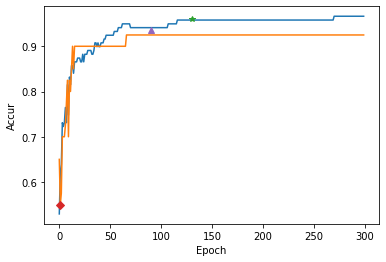

In [ ]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(train_score)
ax.plot(test_score)
ax.plot(130, 0.96, marker='*')
ax.plot(0.5, 0.55, marker='D')
ax.plot(90, 0.935, marker='^')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accur')
plt.show()

- loss='hinge' -> 듀얼에서 약간의 희소성(보증되지 않음)을 발생시키지만 확률 추정에는 도움이 되지 않음.
- tol : 정밀도


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol = None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521]
[0.65, 0.55, 0.575, 0.7, 0.7]


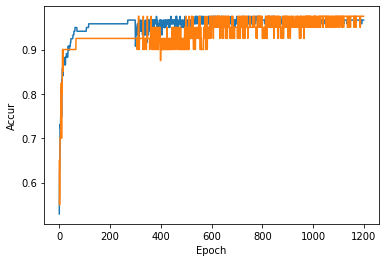

In [ ]:
for _ in range(0, 600):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

# 정확도
print(train_score[:5])
print(test_score[:5])

fig, ax = plt.subplots()
ax.plot(train_score)
ax.plot(test_score)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accur')
plt.show()

- 그래프가,, 왜 저모양인지,, 여전히 최소적합 부분은 있고,, 과대적합 부분도 있는데 Epoch 300 부터 그래프를 어떻게 설명해야 할 지 모르겠다,, 겹치는 것도 있고,, 과소적합 같지는 않고,, 과대적합은 애매한게 아닌것 같고,, 정상인가?
range 부분을 300에서 600을 변경했더니 아예 겹쳐지고 있다. train_score와 test_score 의 점수가 비슷한 값이 나와서 겹쳐져 있나 보다. 이게 좋은 건가?